In [3]:
from datetime import date, datetime
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import jugaad_data.nse as nse

In [4]:
nifty = nse.index_df(symbol="NIFTY 50", from_date=date(2005, 8,1), to_date=datetime.now().date())
nifty['M'] = nifty['HistoricalDate'].dt.month
nifty['Y'] = nifty['HistoricalDate'].dt.year
nifty

,Index Name,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE,M,Y
0,Nifty 50,Nifty 50,2004-03-31,1744.60,1775.30,1740.20,1771.90,3,2004
1,Nifty 50,Nifty 50,2004-03-30,1762.15,1775.40,1746.25,1750.15,3,2004
2,Nifty 50,Nifty 50,2004-03-29,1747.35,1766.15,1739.50,1762.05,3,2004
3,Nifty 50,Nifty 50,2004-03-26,1704.45,1755.45,1703.80,1747.50,3,2004
4,Nifty 50,Nifty 50,2004-03-25,1691.95,1720.65,1691.95,1704.45,3,2004
...,...,...,...,...,...,...,...,...,...
4089,Nifty 50,Nifty 50,2005-08-05,2367.35,2377.10,2355.95,2361.20,8,2005
4090,Nifty 50,Nifty 50,2005-08-04,2357.75,2377.35,2352.05,2367.80,8,2005
4091,Nifty 50,Nifty 50,2005-08-03,2359.10,2377.00,2345.20,2357.00,8,2005
4092,Nifty 50,Nifty 50,2005-08-02,2321.90,2357.15,2319.75,2353.65,8,2005


In [5]:
nifty.sort_values('HistoricalDate', inplace=True)
nifty.reset_index(drop=True, inplace=True)

In [ ]:
nifty.set_index('HistoricalDate', inplace=True)

In [38]:
nifty_monthly = nifty.resample("M").last()

In [39]:
nifty_monthly['Returns'] = (nifty_monthly['CLOSE'] - nifty_monthly['CLOSE'].shift(1))*100/nifty_monthly['CLOSE'].shift(1)
nifty_monthly

,Index Name,INDEX_NAME,OPEN,HIGH,LOW,CLOSE,M,Y,Returns
HistoricalDate,,,,,,,,,
2001-01-31,Nifty 50,Nifty 50,1385.85,1396.05,1369.00,1371.70,1.0,2001.0,NaN
2001-02-28,Nifty 50,Nifty 50,1295.30,1362.25,1294.60,1351.40,2.0,2001.0,-1.479915
2001-03-31,Nifty 50,Nifty 50,1195.05,1195.25,1144.65,1148.20,3.0,2001.0,-15.036259
2001-04-30,Nifty 50,Nifty 50,1101.45,1127.90,1101.45,1125.25,4.0,2001.0,-1.998781
2001-05-31,Nifty 50,Nifty 50,1177.50,1177.50,1154.90,1167.90,5.0,2001.0,3.790269
...,...,...,...,...,...,...,...,...,...
2021-06-30,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-31,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-31,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
heatmap_ret = pd.pivot_table(nifty_monthly, index='Y', columns='M', values=['Returns'])

In [41]:
heatmap_ret.columns = [calendar.month_name[i] for i in range(1,13) ]

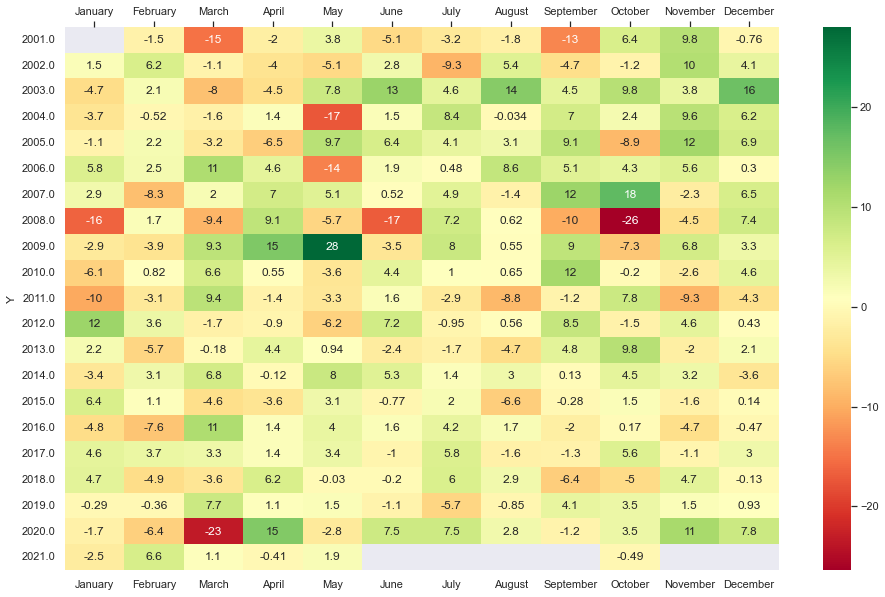

In [42]:
plt.figure(figsize=(16, 10))
ax = sns.heatmap(heatmap_ret, cmap='RdYlGn', annot=True)
ax.tick_params(top=True, labeltop=True)
